<a href="https://colab.research.google.com/github/skyish21/VOIS_AICTE_Oct2025_IshikaSharma/blob/main/AIRBNB%20Hotel%20Booking%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('/content/Airbnb_Open_Data.csv')

/tmp/ipython-input-1860991289.py:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Airbnb_Open_Data.csv')


In [3]:
df.head() # first 5 values

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,85098326012,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,92037596077,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [4]:
df.tail()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102594,6092437,Spare room in Williamsburg,12312296767,verified,Krik,Brooklyn,Williamsburg,40.70862,-73.94651,United States,...,$169,1.0,0.0,NaN,NaN,3.0,1.0,227.0,No Smoking No Parties or Events of any kind Pl...,NaN
102595,6092990,Best Location near Columbia U,77864383453,unconfirmed,Mifan,Manhattan,Morningside Heights,40.80460,-73.96545,United States,...,$167,1.0,1.0,7/6/2015,0.02,2.0,2.0,395.0,House rules: Guests agree to the following ter...,NaN
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.10,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,...,$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN


In [5]:
df.info() # total values, null count, datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [6]:
df.duplicated().value_counts()

,count
False,102058
True,541


False-> no duplicated values

True-> duplicated values

In [7]:
df.head(1).T

,0
id,1001254
NAME,Clean & quiet apt home by the park
host id,80014485718
host_identity_verified,unconfirmed
host name,Madaline
neighbourhood group,Brooklyn
neighbourhood,Kensington
lat,40.64749
long,-73.97237
country,United States


In [8]:
# all values in neighbourhood group column
df['neighbourhood group'].unique()

array(['Brooklyn', 'Manhattan', 'brookln', 'manhatan', 'Queens', nan,
       'Staten Island', 'Bronx'], dtype=object)

In [9]:
# naming consistency in neighborhood group colums
df['neighbourhood group'] = df['neighbourhood group'].replace('brookln', 'Brooklyn')
df['neighbourhood group'] = df['neighbourhood group'].replace('manhatan', 'Manhattan')

In [10]:
# drop dupes
df.drop_duplicates(inplace=True)

# house rules and license have insufficient values so we drop
df.drop(['license', 'house_rules'], axis=1, inplace=True)

# Remove all dollar signs and punctuation marks in price and service fee columns
# use astype to change datatype from object to float
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)
df['service fee'] = df['service fee'].str.replace('$', '').str.replace(',', '').astype(float)

# Rename the price and service fee columns to denote currency
df.rename(columns={'price': 'price_$', 'service fee': 'service_fee_$'}, inplace=True)

# change datatypes of columns to appropriate ones
# Convert boolean-like values to string
df['instant_bookable'] = df['instant_bookable'].astype(str)

# Ensure host id stays int64
df['host id'] = df['host id'].astype('int64')

# Convert to int64 (converts nan values also)
df['Construction year'] = df['Construction year'].astype('Int64')

# Convert last review to datetime
df['last review'] = pd.to_datetime(df['last review'])

# get rid of outliers in availability 365 column
df = df.drop(df[df['availability 365'] > 500].index)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 102057 entries, 0 to 102057
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102057 non-null  int64         
 1   NAME                            101807 non-null  object        
 2   host id                         102057 non-null  int64         
 3   host_identity_verified          101768 non-null  object        
 4   host name                       101653 non-null  object        
 5   neighbourhood group             102028 non-null  object        
 6   neighbourhood                   102041 non-null  object        
 7   lat                             102049 non-null  float64       
 8   long                            102049 non-null  float64       
 9   country                         101525 non-null  object        
 10  country code                    101926 non-null  object      

## EDA (Exploratory Data Analysis)

In [12]:
df.describe()

,id,host id,lat,long,Construction year,price_$,service_fee_$,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365
count,1.020570e+05,1.020570e+05,102049.000000,102049.000000,101843.0,101810.000000,101784.000000,101657.000000,101874.000000,86225,86239.000000,101738.000000,101738.000000,101609.000000
mean,2.918427e+07,4.926729e+10,40.728097,-73.949652,2012.488124,625.350074,125.038149,8.126691,27.515941,2019-06-11 02:12:21.084372224,1.375387,3.278716,7.937005,141.009192
min,1.001254e+06,1.236005e+08,40.499790,-74.249840,2003.0,50.000000,10.000000,-1223.000000,0.000000,2012-07-11 00:00:00,0.010000,1.000000,1.000000,-10.000000
25%,1.509272e+07,2.459916e+10,40.688730,-73.982580,2007.0,340.000000,68.000000,2.000000,1.000000,2018-10-27 00:00:00,0.220000,2.000000,1.000000,3.000000
50%,2.918410e+07,4.912811e+10,40.722290,-73.954440,2012.0,624.500000,125.000000,3.000000,7.000000,2019-06-13 00:00:00,0.740000,3.000000,1.000000,96.000000
75%,4.327604e+07,7.400636e+10,40.762760,-73.932350,2017.0,913.000000,183.000000,5.000000,31.000000,2019-07-05 00:00:00,2.010000,4.000000,2.000000,268.000000
max,5.736742e+07,9.876313e+10,40.916970,-73.705220,2022.0,1200.000000,240.000000,5645.000000,1024.000000,2058-06-16 00:00:00,90.000000,5.000000,332.000000,426.000000
std,1.627177e+07,2.853754e+10,0.055852,0.049502,5.765855,331.669624,66.325303,30.616844,49.567848,NaN,1.748018,1.285084,32.266507,134.974755


In [13]:
# diff types of property in dataset
property_types = df['room type'].value_counts().to_frame()
property_types

,count
room type,
Entire home/apt,53428
Private room,46306
Shared room,2208
Hotel room,115


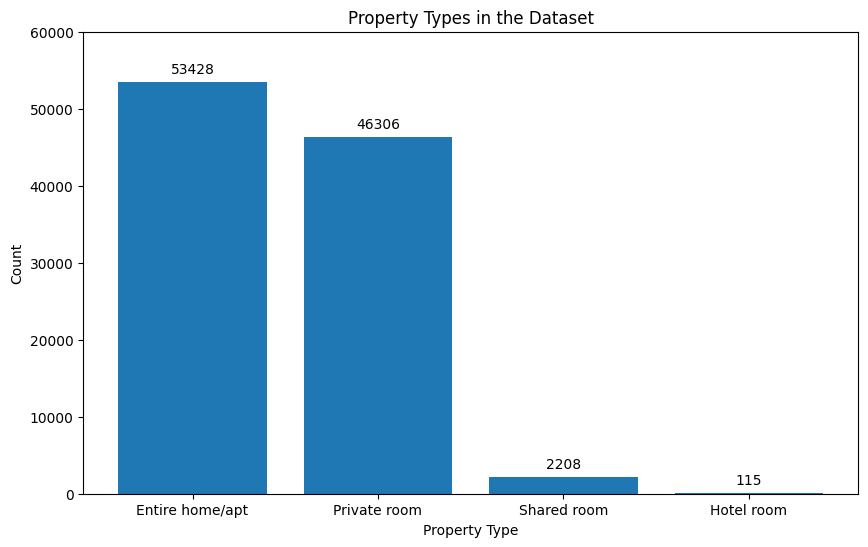

In [14]:
# property types with the help of bar chart
plt.figure(figsize=(10, 6))
room_type_bar = plt.bar(property_types.index, property_types['count'])
plt.bar_label(room_type_bar, labels=property_types['count'], padding =4)
plt.ylim([0,60000])
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Property Types in the Dataset')
plt.show()

In [15]:
# which neighbourhood group has the highest number of listings
hood_group = df['neighbourhood group'].value_counts().to_frame()
hood_group

,count
neighbourhood group,
Manhattan,43557
Brooklyn,41631
Queens,13197
Bronx,2694
Staten Island,949


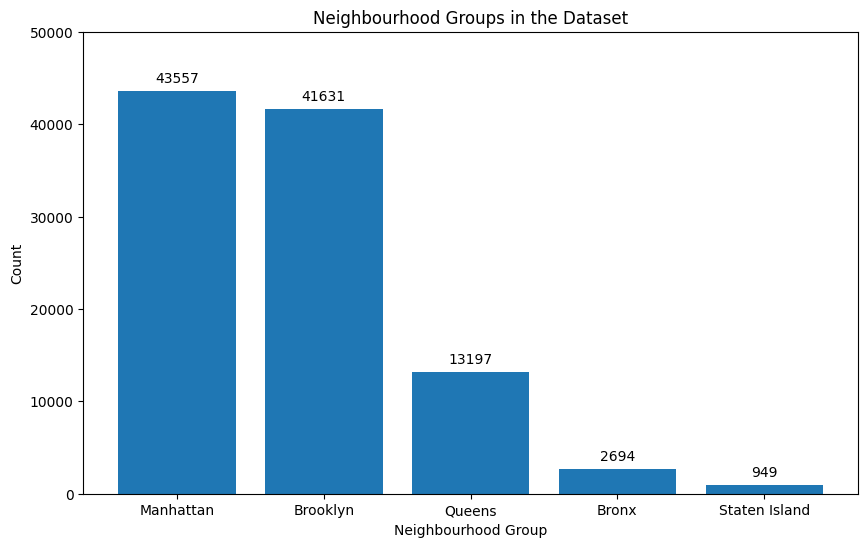

In [16]:
# neighbourhood groups with the help of bar chart
plt.figure(figsize=(10, 6))
hood_group_bar = plt.bar(hood_group.index, hood_group['count'])
plt.bar_label(hood_group_bar, labels=hood_group['count'], padding =4)
plt.ylim([0,50000])
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Neighbourhood Groups in the Dataset')
plt.show()

In [21]:
# which neighbourhood group has the highest avergae price for AirBnb listings
hood_group_price = df.groupby('neighbourhood group')['price_$'].mean().sort_values(ascending = False).to_frame()
hood_group_price['price_$'] = round(hood_group_price['price_$'], 2) # 2 decimal point
hood_group_price

,price_$
neighbourhood group,
Queens,630.22
Bronx,627.76
Brooklyn,626.50
Staten Island,623.99
Manhattan,622.63


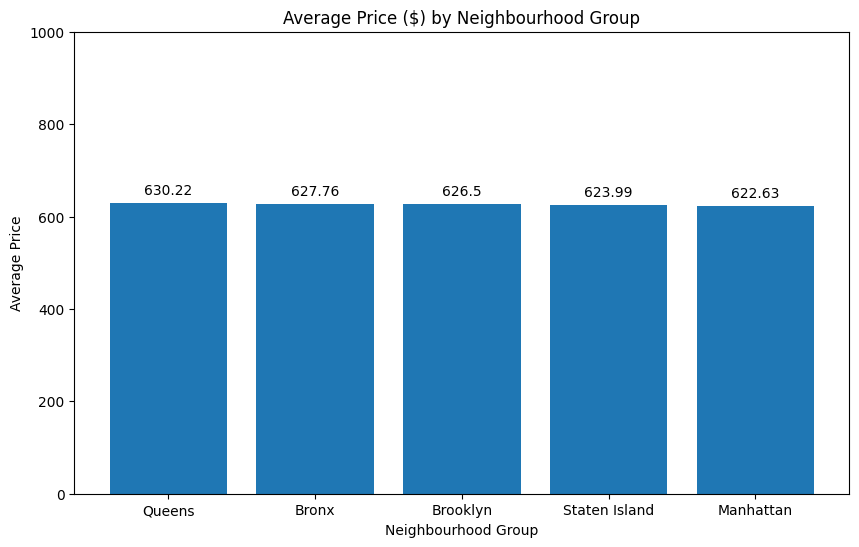

In [23]:
# neighbourhood group has the highest avergae price using bar chart
plt.figure(figsize=(10, 6))
hood_group_price_bar = plt.bar(hood_group_price.index, hood_group_price['price_$'])
plt.bar_label(hood_group_price_bar, labels=hood_group_price['price_$'], padding =4)
plt.ylim([0,1000])
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.title('Average Price ($) by Neighbourhood Group')
plt.show()

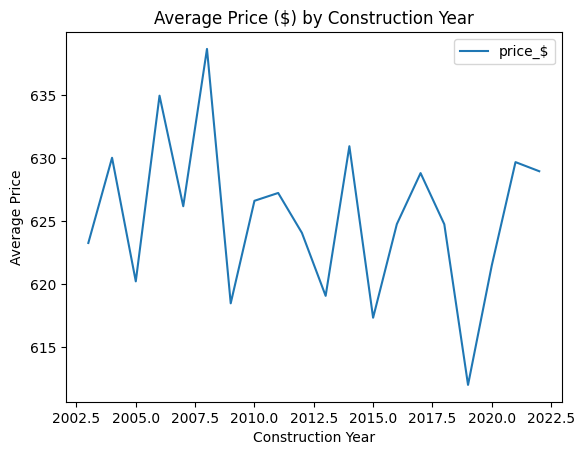

In [25]:
# is there relationship between contruction year of property and price
df.groupby(df['Construction year'])['price_$'].mean().to_frame().plot()
plt.xlabel('Construction Year')
plt.ylabel('Average Price')
plt.title('Average Price ($) by Construction Year')
plt.show()

In [29]:
# who are the top 10 hosts by calculated host listing count
top_hosts = df.groupby('host name')['calculated host listings count'].sum().sort_values(ascending=False).nlargest(10).to_frame()
top_hosts

,calculated host listings count
host name,
Sonder (NYC),155848.0
Blueground,76484.0
Karen,43291.0
Jeniffer,32789.0
Kara,27175.0
Sonder,19680.0
Kaz,18196.0
Ken,17668.0
Corporate Housing,16835.0


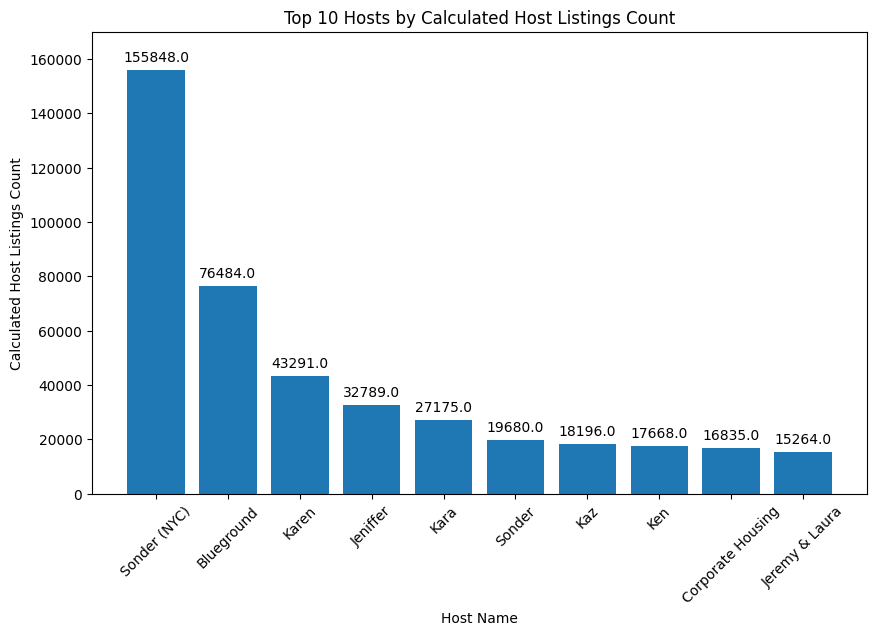

In [31]:
#  top 10 hosts by calculated host listing count using bar chart
plt.figure(figsize=(10, 6))
top_hosts_bar = plt.bar(top_hosts.index, top_hosts['calculated host listings count'])
plt.bar_label(top_hosts_bar, labels=top_hosts['calculated host listings count'], padding =4)
plt.ylim([0,170000])
plt.xlabel('Host Name')
plt.xticks(rotation=45)
plt.ylabel('Calculated Host Listings Count')
plt.title('Top 10 Hosts by Calculated Host Listings Count')
plt.show()

In [35]:
# are hosts with verified identities more likely to postivie reviews

review = df.groupby('host_identity_verified')['review rate number'].mean().sort_values(ascending=False).to_frame()
review['review rate number'] = round(review['review rate number'], 2)
review

,review rate number
host_identity_verified,
verified,3.29
unconfirmed,3.27


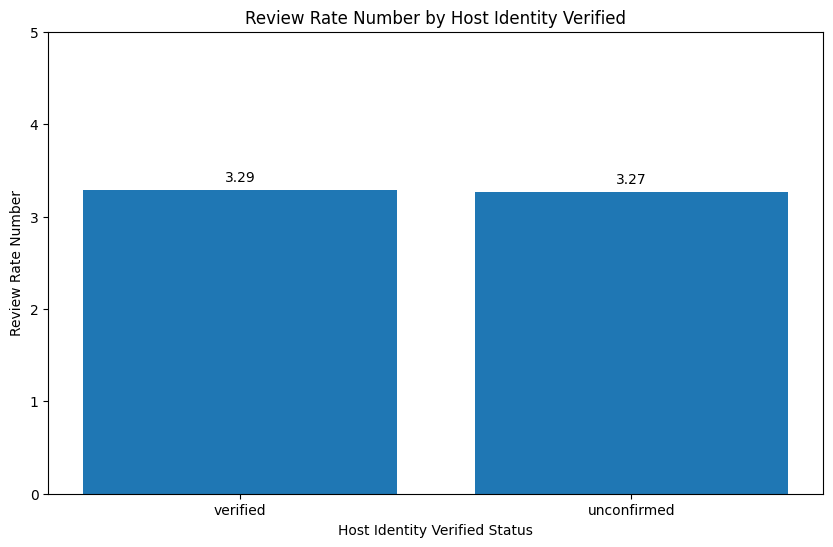

In [37]:
#  verified identities more likely to postivie reviews using
plt.figure(figsize=(10, 6))
review_bar = plt.bar(review.index, review['review rate number'])
plt.bar_label(review_bar, labels=review['review rate number'], padding =4)
plt.ylim([0,5])
plt.xlabel('Host Identity Verified Status')
plt.ylabel('Review Rate Number')
plt.title('Review Rate Number by Host Identity Verified')
plt.show()

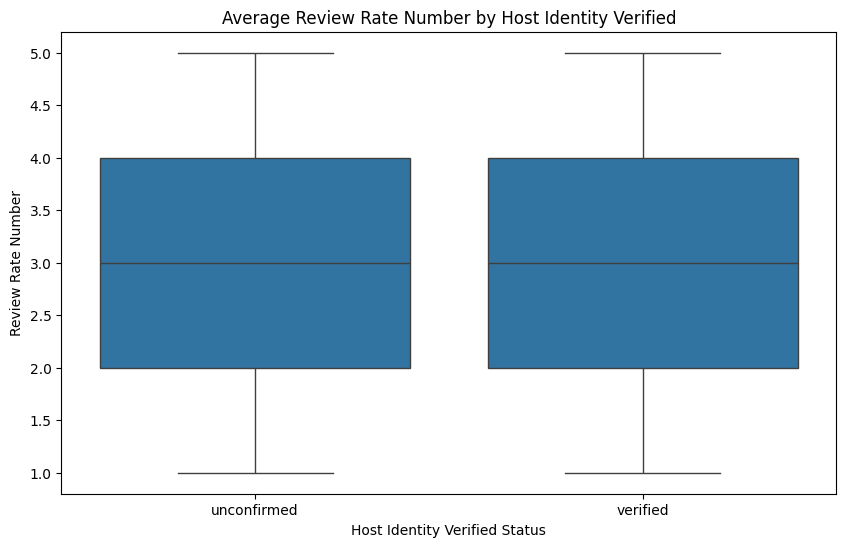

In [39]:
# Average review rates for each verification status using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='host_identity_verified', y='review rate number', data=df)
plt.xlabel('Host Identity Verified Status')
plt.ylabel('Review Rate Number')
plt.title('Average Review Rate Number by Host Identity Verified')
plt.show()

In [52]:
# is there correlation between the price of listing and its service fee
df['price_$'].corr(df['service_fee_$'])

np.float64(0.9999908752435218)

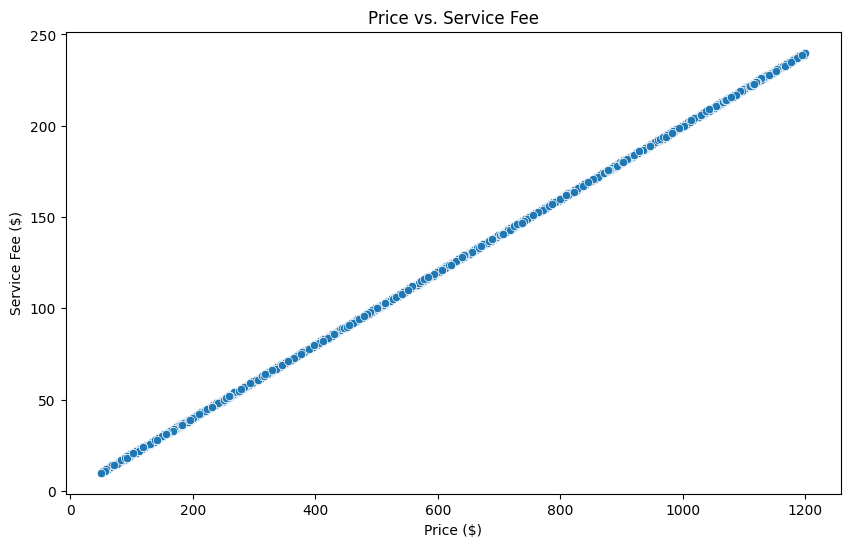

In [51]:
# correlation scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='price_$', y='service_fee_$', data=df)
plt.xlabel('Price ($)')
plt.ylabel('Service Fee ($)')
plt.title('Price vs. Service Fee')
plt.show()

In [53]:
#  what is the average review rate number(e.g. stars) for listings and does it vary based on neighbourhood group and room type
avg_review = df.groupby(['neighbourhood group', 'room type'])['review rate number'].mean().to_frame()
avg_review

review rate number
neighbourhood group room type                          
Bronx               Entire home/apt            3.346154
                    Private room               3.326873
                    Shared room                3.260870
Brooklyn            Entire home/apt            3.249963
                    Hotel room                 3.857143
                    Private room               3.263716
                    Shared room                3.334957
Manhattan           Entire home/apt            3.275803
                    Hotel room                 3.500000
                    Private room               3.277431
                    Shared room                3.254199
Queens              Entire home/apt            3.349306
                    Hotel room                 3.750000
                    Private room               3.315584
                    Shared room                3.369748
Staten Island       Entire home/apt            3.329087
                    Private room               3.477024
                    Shared room                3.533333

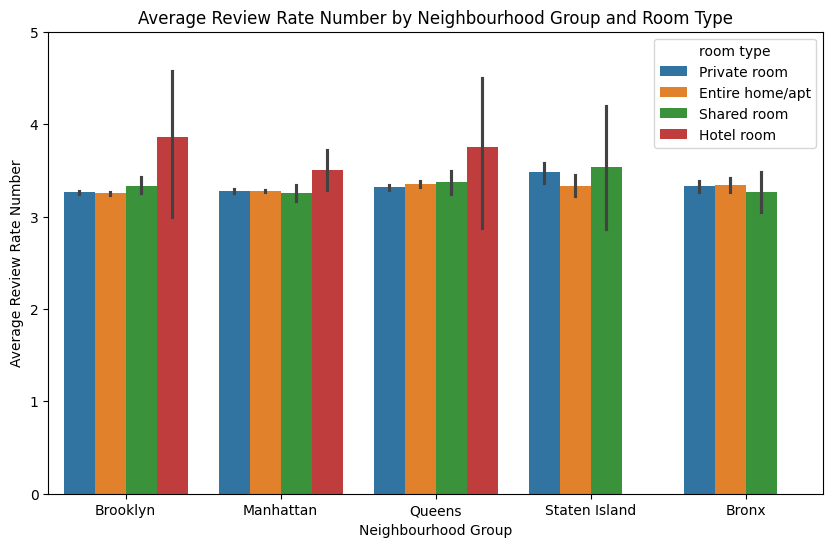

In [55]:
# graph for avergae review rate based on neighbourhood group and room type
plt.figure(figsize=(10, 6))
sns.barplot(x='neighbourhood group', y='review rate number', hue='room type', data=df)
plt.xlabel('Neighbourhood Group')
plt.ylim([0,5])
plt.ylabel('Average Review Rate Number')
plt.title('Average Review Rate Number by Neighbourhood Group and Room Type')
plt.show()

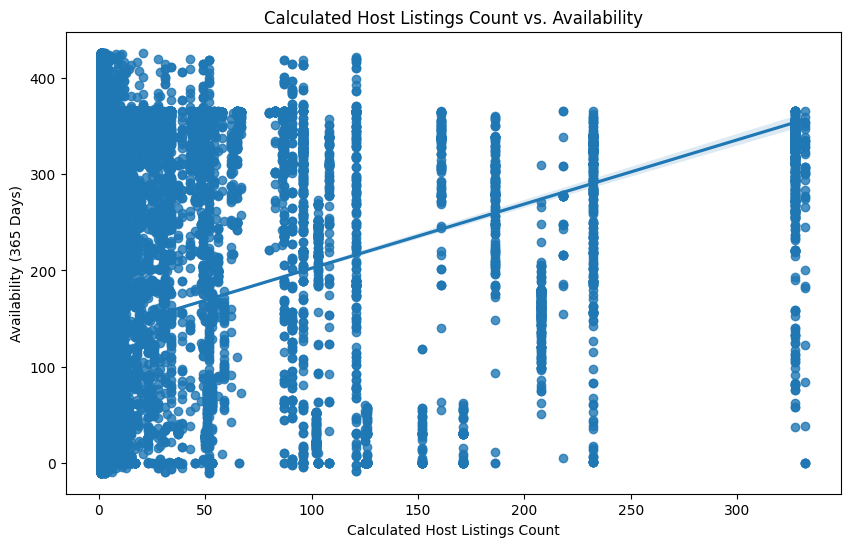

In [57]:
# are hosts with a highger calculated host listings count more likely to maintain higher availability throughout the year
plt.figure(figsize=(10, 6))
sns.regplot(x='calculated host listings count', y='availability 365', data=df)
plt.xlabel('Calculated Host Listings Count')
plt.ylabel('Availability (365 Days)')
plt.title('Calculated Host Listings Count vs. Availability')
plt.show()

In [58]:
df['calculated host listings count'].corr(df['availability 365'])

np.float64(0.15959891314313554)

In [59]:
# indicates weak positive relationship between both